In [0]:
!pip install catboost

     |████████████████████████████████| 63.6MB 34kB/s 


In [0]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/team_project/Dataset3.csv', sep=',' , encoding='CP949')

In [0]:
data

,NODE_ID,NODE_NAME,SI_CODE,GU_CODE,X,Y,Longitude,Latitude,Radius,trafficlight_num,crosswalk_num,station_num,school_num,land_price,house_1,house_2,house_3,house_4,commerce_1,commerce_2,commerce_3,commerce_4,green_1,green_2,green_3,industry_1,industry_2,industry_3,limit_num,mediansep_,island_num,mean_lanes,mean_speed,mean_wth,mean_loadlen,busstop_num,police_num,CtoC_num,CtoP_num,total_acc
0,1150016800,현대맨션,A,DD,9.419266e+05,1950157.631,126.842562,37.548928,37,0,1,0,0,5.102635e+07,0.996526,0.003474,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,30.0,4.500000,281.000000,0,0,1,0,1
1,1160006100,신흥빌라,A,GG,9.425428e+05,1942717.922,126.850119,37.481912,37,0,1,0,1,2.834985e+07,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,1.00,60.0,4.000000,645.500000,1,0,3,2,5
2,1160035000,연흥학원,A,GG,9.457569e+05,1944979.108,126.886304,37.502487,37,0,1,0,0,8.244801e+07,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,30.0,4.666667,130.333333,0,1,2,3,5
3,1160044000,한일유앤아이아파트,A,GG,9.425526e+05,1945551.749,126.850009,37.507454,37,0,0,0,2,1.929201e+07,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,60.0,3.000000,433.000000,2,0,0,4,4
4,1100025000,연지초교,A,II,9.610632e+05,1959527.770,127.058698,37.634391,37,0,1,1,1,2.064954e+07,0.986185,0.013815,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,2,1.00,30.0,4.500000,616.000000,0,1,7,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,1380028700,-,B,PP,1.147437e+06,1691149.431,129.119698,35.204871,54,9,0,0,0,9.516307e+05,0.000000,0.000000,0.326679,0.000000,0.0,0.0,0.0,0.0,0.673321,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,3.40,56.0,42.225000,7500.000000,0,0,34,3,37
6052,1380029400,-,B,PP,1.147537e+06,1692084.379,129.120957,35.213283,55,12,2,0,0,3.826632e+06,0.000000,0.048482,0.000000,0.000000,0.0,0.0,0.0,0.0,0.064315,0.0,0.0,0.0,0.0,0.0,0.887203,1,2,4.00,52.5,42.225000,7500.000000,0,0,62,4,66
6053,1320005200,-,B,EE,1.142002e+06,1682717.438,129.058556,35.129650,56,0,0,0,0,3.825333e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1,1,3.75,57.5,50.000000,3400.000000,0,0,30,10,40
6054,1320004900,-,B,EE,1.141862e+06,1682590.225,129.056998,35.128523,56,0,0,0,0,1.623048e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1,0,3.40,52.0,50.000000,3400.000000,0,0,4,1,5


In [0]:
raw_x = data[['trafficlight_num','crosswalk_num','station_num','school_num','land_price','house_1','house_2','house_3','house_4','commerce_1','commerce_2','commerce_3','commerce_4','green_1','green_2','green_3','industry_1','industry_2','industry_3','limit_num','mediansep_','island_num','mean_lanes','mean_speed','mean_wth','mean_loadlen','busstop_num','police_num']]
raw_y = data[['total_acc']]
raw_y_CtoC = data[['CtoC_num']]
raw_y_CtoP = data[['CtoP_num']]

In [0]:
raw_x

,trafficlight_num,crosswalk_num,station_num,school_num,land_price,house_1,house_2,house_3,house_4,commerce_1,commerce_2,commerce_3,commerce_4,green_1,green_2,green_3,industry_1,industry_2,industry_3,limit_num,mediansep_,island_num,mean_lanes,mean_speed,mean_wth,mean_loadlen,busstop_num,police_num
0,0,1,0,0,5.102635e+07,0.996526,0.003474,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,30.0,4.500000,281.000000,0,0
1,0,1,0,1,2.834985e+07,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,1.00,60.0,4.000000,645.500000,1,0
2,0,1,0,0,8.244801e+07,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,30.0,4.666667,130.333333,0,1
3,0,0,0,2,1.929201e+07,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,60.0,3.000000,433.000000,2,0
4,0,1,1,1,2.064954e+07,0.986185,0.013815,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,2,1.00,30.0,4.500000,616.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,9,0,0,0,9.516307e+05,0.000000,0.000000,0.326679,0.000000,0.0,0.0,0.0,0.0,0.673321,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,3.40,56.0,42.225000,7500.000000,0,0
6052,12,2,0,0,3.826632e+06,0.000000,0.048482,0.000000,0.000000,0.0,0.0,0.0,0.0,0.064315,0.0,0.0,0.0,0.0,0.0,0.887203,1,2,4.00,52.5,42.225000,7500.000000,0,0
6053,0,0,0,0,3.825333e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1,1,3.75,57.5,50.000000,3400.000000,0,0
6054,0,0,0,0,1.623048e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1,0,3.40,52.0,50.000000,3400.000000,0,0


In [0]:
x, test_x , y, test_y = train_test_split(raw_x, raw_y, test_size = 0.2,random_state = 42)
x_CtoC, test_x_CtoC , y_CtoC, test_y_CtoC = train_test_split(raw_x, raw_y_CtoC, test_size = 0.2, random_state = 42)
x_CtoP, test_x_CtoP , y_CtoP, test_y_CtoP = train_test_split(raw_x, raw_y_CtoP, test_size = 0.2, random_state = 42)

In [0]:
model = CatBoostRegressor(iterations=3000,learning_rate = 0.01,depth=10,verbose=1)

In [0]:
start = time.time()
model.fit(x,y, eval_set = (test_x,test_y), verbose = True, use_best_model= True, early_stopping_rounds= 4000)
print("time :", time.time() - start, "seconds")

0:	learn: 44.4903242	test: 42.2140348	best: 42.2140348 (0)	total: 76.6ms	remaining: 3m 49s
1:	learn: 44.2446282	test: 41.9656554	best: 41.9656554 (1)	total: 143ms	remaining: 3m 33s
2:	learn: 44.0184898	test: 41.7413206	best: 41.7413206 (2)	total: 195ms	remaining: 3m 14s
3:	learn: 43.7992274	test: 41.5134456	best: 41.5134456 (3)	total: 222ms	remaining: 2m 46s
4:	learn: 43.5727178	test: 41.2995767	best: 41.2995767 (4)	total: 271ms	remaining: 2m 42s
5:	learn: 43.3506865	test: 41.0657551	best: 41.0657551 (5)	total: 322ms	remaining: 2m 40s
6:	learn: 43.1321123	test: 40.8481941	best: 40.8481941 (6)	total: 369ms	remaining: 2m 37s
7:	learn: 42.9273031	test: 40.6508024	best: 40.6508024 (7)	total: 415ms	remaining: 2m 35s
8:	learn: 42.7055650	test: 40.4285318	best: 40.4285318 (8)	total: 464ms	remaining: 2m 34s
9:	learn: 42.4925190	test: 40.2231177	best: 40.2231177 (9)	total: 511ms	remaining: 2m 32s
10:	learn: 42.2765023	test: 40.0038192	best: 40.0038192 (10)	total: 562ms	remaining: 2m 32s
11:	lea

In [0]:
predict_y = model.predict(test_x)

In [0]:
predict_y

array([24.42805935, 98.32366433, 15.02521986, ...,  7.57980377,
       39.34888147, 10.52947001])

In [0]:
mse = mean_squared_error(test_y, predict_y)
r2 = r2_score(test_y,predict_y)

mse_lst = []
r2_lst = []

mse_lst.append(mse)
r2_lst.append(r2)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

print(len(mse_lst))
print('mean of mse: ',np.mean(mse_lst))
print('mean of r2: ',np.mean(r2_lst))

Mean squared error:  513.7981999058151
R2 score:  0.7146275173323882
1
mean of mse:  513.7981999058151
mean of r2:  0.7146275173323882


In [0]:
model = CatBoostRegressor(iterations=3000,learning_rate = 0.01,depth=10,verbose=1)
start = time.time()
model.fit(x_CtoC,y_CtoC, eval_set = (test_x_CtoC,test_y_CtoC), verbose = True, use_best_model= True, early_stopping_rounds= 3000)
print("time :", time.time() - start)

0:	learn: 38.0412960	test: 35.9616361	best: 35.9616361 (0)	total: 37.7ms	remaining: 1m 53s
1:	learn: 37.8395405	test: 35.7553989	best: 35.7553989 (1)	total: 74.2ms	remaining: 1m 51s
2:	learn: 37.6301527	test: 35.5407323	best: 35.5407323 (2)	total: 115ms	remaining: 1m 55s
3:	learn: 37.4383645	test: 35.3375104	best: 35.3375104 (3)	total: 154ms	remaining: 1m 55s
4:	learn: 37.2410056	test: 35.1339689	best: 35.1339689 (4)	total: 198ms	remaining: 1m 58s
5:	learn: 37.0374383	test: 34.9238226	best: 34.9238226 (5)	total: 235ms	remaining: 1m 57s
6:	learn: 36.8436192	test: 34.7193130	best: 34.7193130 (6)	total: 275ms	remaining: 1m 57s
7:	learn: 36.6579845	test: 34.5302629	best: 34.5302629 (7)	total: 312ms	remaining: 1m 56s
8:	learn: 36.4695897	test: 34.3437305	best: 34.3437305 (8)	total: 352ms	remaining: 1m 57s
9:	learn: 36.2805053	test: 34.1463909	best: 34.1463909 (9)	total: 389ms	remaining: 1m 56s
10:	learn: 36.0977368	test: 33.9691446	best: 33.9691446 (10)	total: 425ms	remaining: 1m 55s
11:	le

In [0]:
predict_y_CtoC = model.predict(test_x_CtoC)

In [0]:
predict_y_CtoC

array([17.12634768, 84.20262581,  8.93888428, ...,  3.8607169 ,
       33.83957024,  8.90036926])

In [0]:
CtoC_mse = mean_squared_error(test_y_CtoC, predict_y_CtoC)
CtoC_r2 = r2_score(test_y_CtoC, predict_y_CtoC)

CtoC_mse_lst = []
CtoC_r2_lst = []

CtoC_mse_lst.append(CtoC_mse)
CtoC_r2_lst.append(CtoC_r2)

print('Mean squared error: ', CtoC_mse)
print('R2 score: ', CtoC_r2)

print(len(CtoC_mse_lst))
print('mean of mse: ',np.mean(CtoC_mse_lst))
print('mean of r2: ',np.mean(CtoC_r2_lst))

Mean squared error:  369.0773222294252
R2 score:  0.7174194541456866
1
mean of mse:  369.0773222294252
mean of r2:  0.7174194541456866


In [0]:
model = CatBoostRegressor(iterations=3000,learning_rate = 0.01,depth=10,verbose=1)
start = time.time()
model.fit(x,y_CtoP, eval_set = (test_x,test_y_CtoP), verbose = True, use_best_model= True, early_stopping_rounds= 3000)
print("time :", time.time() - start)

0:	learn: 9.8149810	test: 9.5232935	best: 9.5232935 (0)	total: 39.7ms	remaining: 1m 59s
1:	learn: 9.7825713	test: 9.4945951	best: 9.4945951 (1)	total: 77.2ms	remaining: 1m 55s
2:	learn: 9.7518412	test: 9.4694346	best: 9.4694346 (2)	total: 117ms	remaining: 1m 56s
3:	learn: 9.7224455	test: 9.4421140	best: 9.4421140 (3)	total: 154ms	remaining: 1m 55s
4:	learn: 9.6927151	test: 9.4163201	best: 9.4163201 (4)	total: 196ms	remaining: 1m 57s
5:	learn: 9.6620412	test: 9.3913297	best: 9.3913297 (5)	total: 233ms	remaining: 1m 56s
6:	learn: 9.6307917	test: 9.3626642	best: 9.3626642 (6)	total: 275ms	remaining: 1m 57s
7:	learn: 9.6005150	test: 9.3343103	best: 9.3343103 (7)	total: 314ms	remaining: 1m 57s
8:	learn: 9.5711365	test: 9.3076848	best: 9.3076848 (8)	total: 356ms	remaining: 1m 58s
9:	learn: 9.5401909	test: 9.2816292	best: 9.2816292 (9)	total: 394ms	remaining: 1m 57s
10:	learn: 9.5101637	test: 9.2563602	best: 9.2563602 (10)	total: 436ms	remaining: 1m 58s
11:	learn: 9.4847438	test: 9.2317326	be

In [0]:
predict_y_CtoP = model.predict(test_x_CtoP)

In [0]:
predict_y_CtoP

array([ 8.19146638, 15.26817175,  6.28597477, ...,  3.68696419,
        4.76881471,  1.33203488])

In [0]:
CtoP_mse = mean_squared_error(test_y_CtoP, predict_y_CtoP)
CtoP_r2 = r2_score(test_y_CtoP, predict_y_CtoP)

CtoP_mse_lst = []
CtoP_r2_lst = []

CtoP_mse_lst.append(CtoP_mse)
CtoP_r2_lst.append(CtoP_r2)

print('Mean squared error: ', CtoP_mse)
print('R2 score: ', CtoP_r2)

print(len(CtoP_mse_lst))
print('mean of mse: ',np.mean(CtoP_mse_lst))
print('mean of r2: ',np.mean(CtoP_r2_lst))

Mean squared error:  49.17601320672615
R2 score:  0.46058698893929617
1
mean of mse:  49.17601320672615
mean of r2:  0.46058698893929617


In [0]:
combined_result = predict_y_CtoC + predict_y_CtoP

In [0]:
test_y

,total_acc
1033,17
5936,124
1057,12
2519,15
4553,8
...,...
903,7
2083,14
109,2
5738,26


In [0]:
predict_y

array([24.42805935, 98.32366433, 15.02521986, ...,  7.57980377,
       39.34888147, 10.52947001])

In [0]:
combined_result

array([25.31781406, 99.47079757, 15.22485906, ...,  7.54768109,
       38.60838494, 10.23240414])

In [0]:
combined_mse = mean_squared_error(test_y, combined_result)
combined_r2 = r2_score(test_y,combined_result)

combined_mse_lst = []
combined_r2_lst = []

combined_mse_lst.append(combined_mse)
combined_r2_lst.append(combined_r2)

print('total Mean squared error: ', mse)
print('total R2 score: ', r2)

print('Combined Mean squared error: ', combined_mse)
print('Combined R2 score: ', combined_r2)

print(len(combined_mse_lst))
print('combined mean of mse: ',np.mean(combined_mse_lst))
print('combined mean of r2: ',np.mean(combined_r2_lst))

total Mean squared error:  513.7981999058151
total R2 score:  0.7146275173323882
Combined Mean squared error:  520.8986441290357
Combined R2 score:  0.7106838067541985
1
combined mean of mse:  520.8986441290357
combined mean of r2:  0.7106838067541985


In [0]:
# if  "Radius" in raw_x:
#     case1 = mse
#     case2 = combined_mse
# else:    
#     case3 = mse
#     case4 = combined_mse

In [0]:
result = pd.concat([test_y.reset_index(drop = True), pd.DataFrame(predict_y)], axis = 1)

In [0]:
result.columns = ['label','predict']

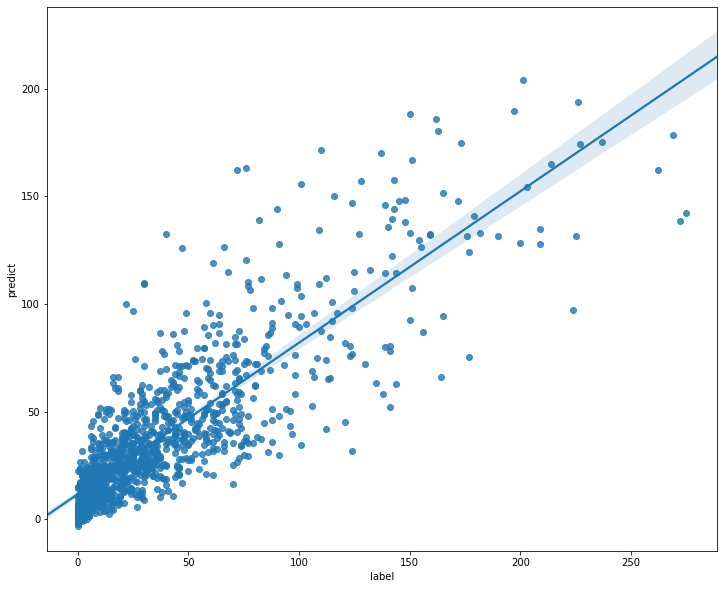

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.regplot(x = 'label', y = 'predict', data = result, ax = ax)

In [0]:
# import matplotlib.pyplot as plt

In [0]:
# x = ['case1', 'case2', 'case3', 'case4']
# y = [case1, case2, case3, case4]

# plt.xlabel('catboost')
# plt.ylabel('mse')
# plt.bar(x,y,width = 0.7, color = 'green')

In [0]:
# for cases in y:
#     print(cases)

In [0]:
# import matplotlib.pyplot as plt

# x = ['case1', 'case2', 'case3', 'case4']
# y = [521.959466559927, 524.1832198102406, 513.7981999058151, 520.8986441290357]

# plt.xlabel('catboost')
# plt.ylabel('mse')
# plt.ylim(510,525)
# plt.bar(x,y,width = 0.7, color = 'green')